## Banknote Authentication Data Set

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Problem definition: 

Can we classify bank note as fake or genuine?

Link: [Banknote Authentication](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
# import all dependencies without running all import commands 
# !pip3 install pyforest

In [2]:
from pyforest import *

In [3]:
lazy_imports()

['from fbprophet import Prophet',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.ensemble import RandomForestClassifier',
 'import nltk',
 'import gensim',
 'import xgboost as xgb',
 'from sklearn.ensemble import RandomForestRegressor',
 'from openpyxl import load_workbook',
 'from pathlib import Path',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import Lasso',
 'import pandas as pd',
 'from dask import dataframe as dd',
 'import fbprophet',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.model_selection import GridSearchCV',
 'import imutils',
 'import statistics',
 'import glob',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import RobustScaler',
 'import sys',
 'from sklearn.linear_model import LinearRegression',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pyspark import

In [4]:
# import data set
df = pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

## Data Pre-Processing

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.shape

(1372, 5)

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
# check empty cells in the dataset
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Exploratory Data Analysis

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
# check data types
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Class'}, xlabel='class', ylabel='Density'>

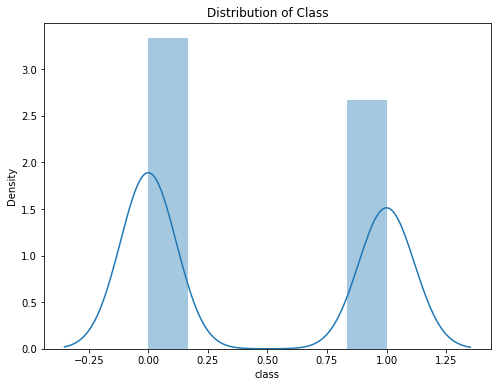

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Class')
sns.distplot(df['class'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

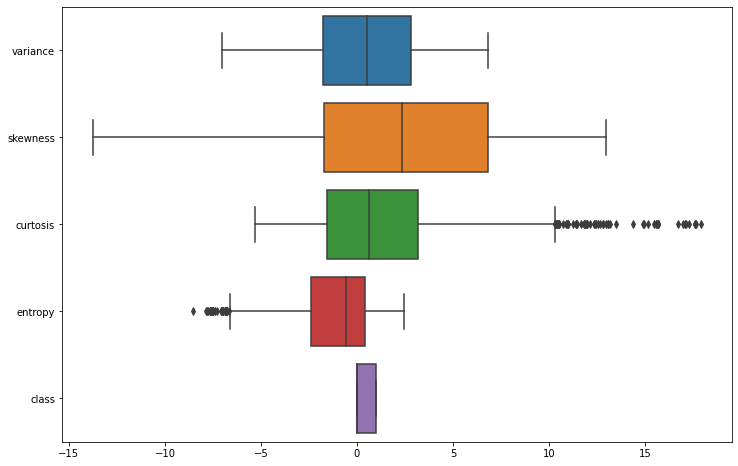

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')

<IPython.core.display.Javascript object>

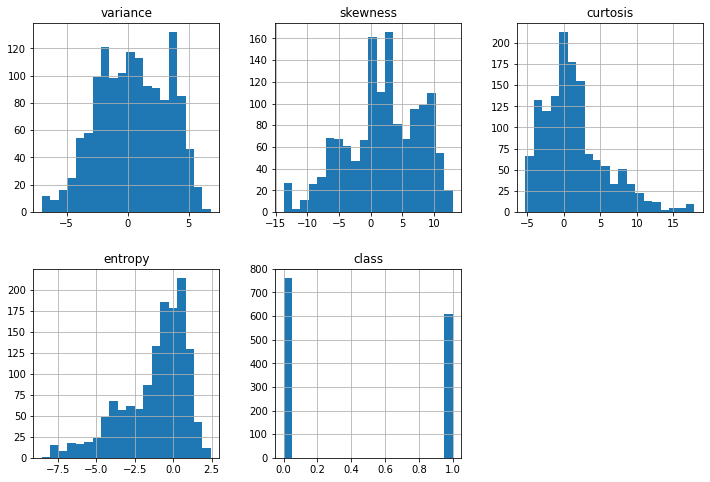

In [15]:
df.hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

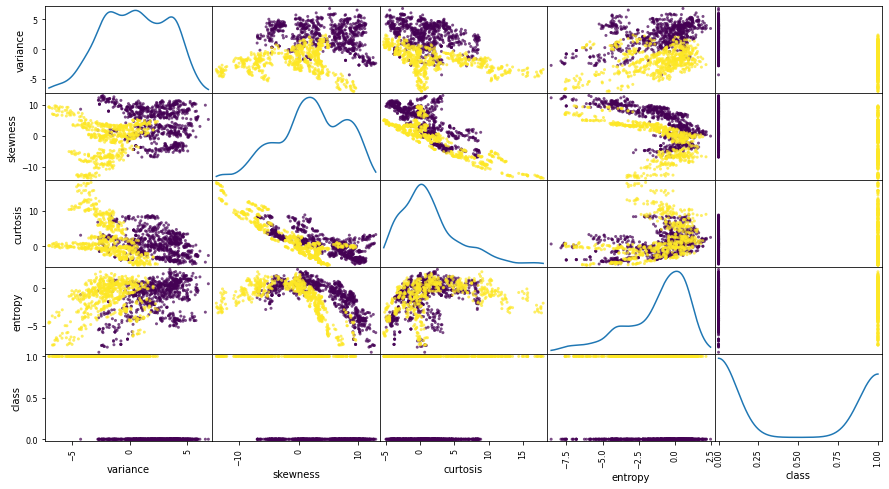

In [16]:
pd.plotting.scatter_matrix(df, diagonal='kde', alpha=0.7, figsize=(15, 8), c=df['class'])
plt.show()

<IPython.core.display.Javascript object>

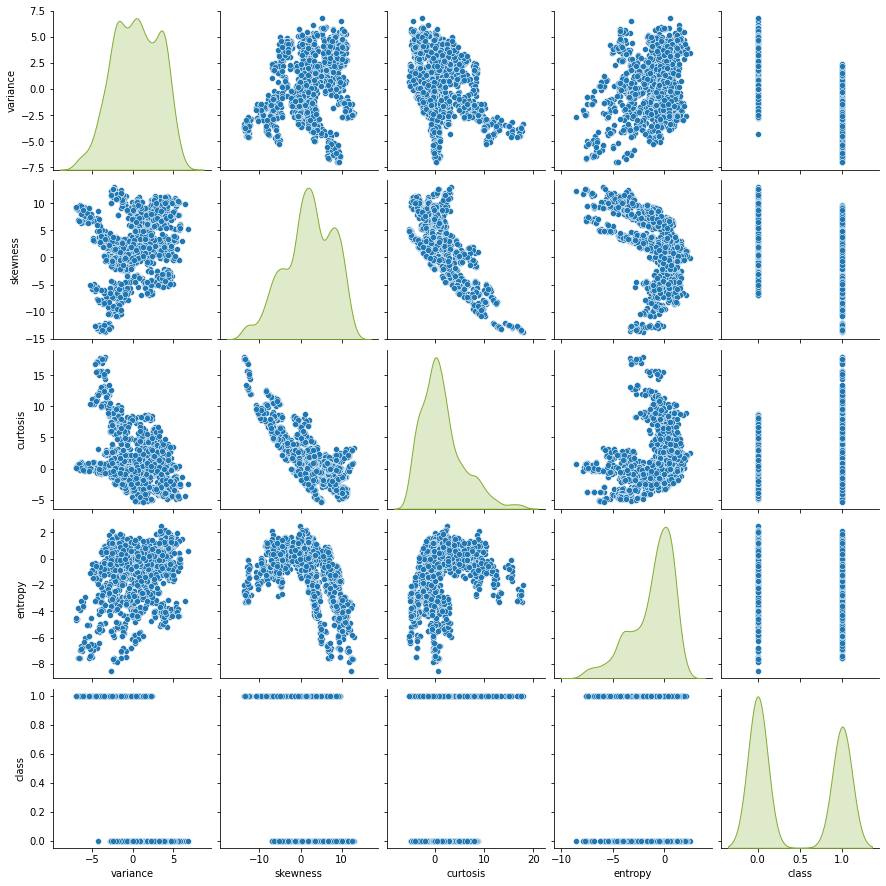

In [17]:
sns.pairplot(
    df, 
    diag_kind='kde',
    diag_kws= {'color': '#82ad32'})

<IPython.core.display.Javascript object>

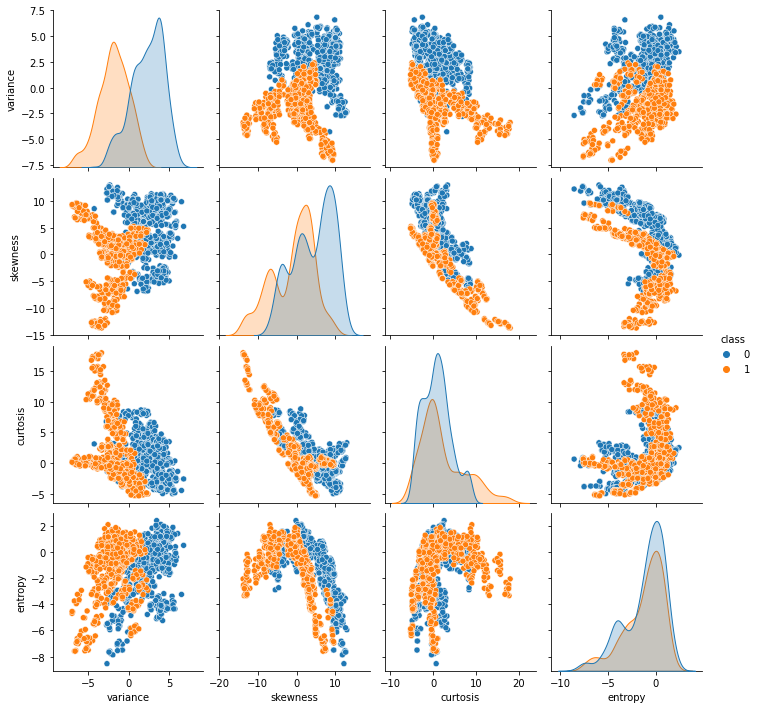

In [18]:
# compare two different class with seaborn pairplot
sns.pairplot(df, hue='class')

## Data Preparation

In [19]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
# split data into training and test set, 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=1)

<IPython.core.display.Javascript object>

In [22]:
# scale dataset by using StandardScaler
# since y is our target, we don't have to transform it
scaler = StandardScaler()

# fit_transform() on training set, transform() on test set in order to prevent data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# same as 
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [23]:
X_train

array([[ 0.10527877, -0.27983064,  0.2259937 ,  0.78802844],
       [-0.99840564, -1.18889897,  1.31324557,  0.52830217],
       [-0.4363023 , -0.32105208, -0.31909545,  0.38825872],
       ...,
       [-1.71754187,  0.71675177, -0.17167062, -2.05109895],
       [ 0.57142352,  0.01090731,  0.22034811,  0.51719724],
       [-0.98516431,  0.29693578, -0.48180637, -0.03803285]])

In [24]:
X_test

array([[-1.42641109, -0.01259638, -0.26590547, -0.60744898],
       [ 0.30902392,  0.45060969,  0.2490404 ,  0.66464143],
       [-1.59283782, -1.79639493,  2.73241391, -0.12872913],
       ...,
       [ 1.52861815,  0.02427558, -0.38066239,  1.30256401],
       [ 2.27680678,  0.56812811, -0.93286669,  0.8176419 ],
       [ 1.09911369, -0.21799586,  0.10223072,  0.86453106]])

In [25]:
y_train

694     0
880     1
1251    1
812     1
1212    1
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 960, dtype: int64

In [26]:
y_test

1240    1
703     0
821     1
1081    1
37      0
       ..
559     0
400     0
439     0
634     0
628     0
Name: class, Length: 412, dtype: int64

## Data Modeling

### Logistic Regression

In [27]:
# solver ='liblinear' is a good option for small dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

logReg = LogisticRegression(solver ='liblinear', random_state=1)

logReg.fit(X_train, y_train)

accuracies_logReg = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_logReg)
print("Mean Accuracy: {:.2f}%".format(accuracies_logReg.mean()*100))

Accuracies:
 [0.97916667 0.98958333 0.98958333 0.98958333 0.97916667 0.95833333
 1.         0.97916667 0.97916667 0.97916667]
Mean Accuracy: 98.23%


In [28]:
# make prediction
pred_logReg= logReg.predict(X_test)
pred_logReg

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

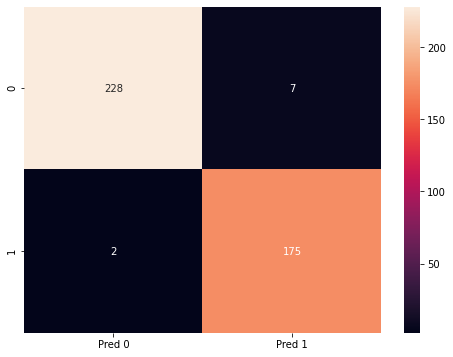

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

cm_logReg = confusion_matrix(y_test, pred_logReg, labels=[0, 1])

df_cm_logReg = pd.DataFrame(cm_logReg, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_logReg, annot=True, fmt='d')
plt.show()

In [30]:
print('Logistic Regression Classification Report')
print('...'*10)
print(classification_report(y_test, pred_logReg))

Logistic Regression Classification Report
..............................
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       235
           1       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



### Support Vector Machine

In [31]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train, y_train)

accuracies_svm_linear = cross_val_score(estimator=svm_linear, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_svm_linear)
print("Mean Accuracy: {:.2f}%".format(accuracies_svm_linear.mean()*100))

Accuracies:
 [0.97916667 1.         0.98958333 0.98958333 0.97916667 0.95833333
 1.         0.97916667 0.97916667 0.98958333]
Mean Accuracy: 98.44%


In [32]:
pred_svm_linear = svm_linear.predict(X_test)
pred_svm_linear

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

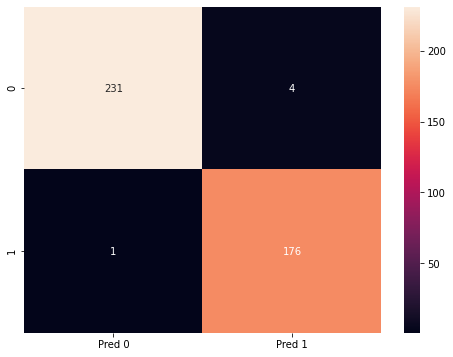

In [33]:
cm_svm_linear = confusion_matrix(y_test, pred_svm_linear, labels=[0, 1])

df_cm_svm_linear = pd.DataFrame(cm_svm_linear, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_svm_linear, annot=True, fmt='d')
plt.show()

In [34]:
# using solver ='rbf' by default
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

accuracies_svm_rbf = cross_val_score(estimator=svm_rbf, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_svm_rbf)
print("Mean Accuracy: {:.2f}%".format(accuracies_svm_rbf.mean()*100))

# In this case, we have to be cautious about overfitting

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%


In [35]:
pred_svm_rbf = svm_rbf.predict(X_test)
pred_svm_rbf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

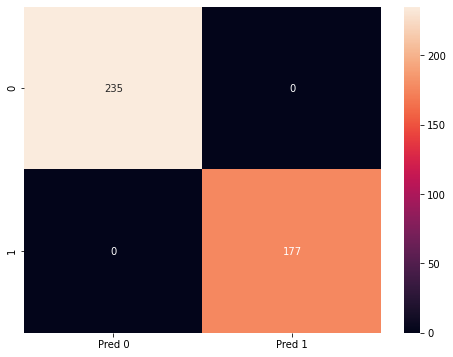

In [36]:
cm_svm_rbf = confusion_matrix(y_test, pred_svm_rbf, labels=[0, 1])

df_cm_svm_rbf = pd.DataFrame(cm_svm_rbf, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_svm_rbf, annot=True, fmt='d')
plt.show()

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)

rf.fit(X_train, y_train)

accuracies_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_rf)
print("Mean Accuracy: {:.2f}%".format(accuracies_rf.mean()*100))


Accuracies:
 [0.98958333 0.96875    0.98958333 0.98958333 0.98958333 0.98958333
 1.         1.         1.         1.        ]
Mean Accuracy: 99.17%


In [38]:
pred_rf = rf.predict(X_test)
pred_rf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

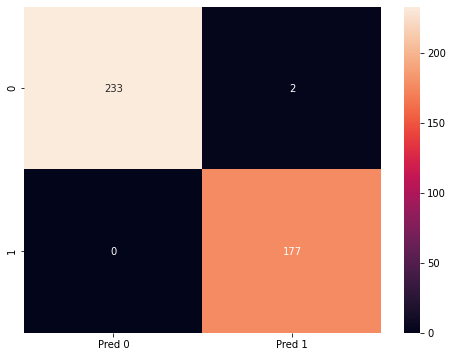

In [39]:
cm_rf = confusion_matrix(y_test, pred_rf, labels=[0, 1])

df_cm_rf = pd.DataFrame(cm_rf, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf, annot=True, fmt='d')
plt.show()

### K Nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

# introducing grid search to find the best hyperparameters

# setting hyperparameters in a dictionary
param_grid = {
    'leaf_size':[2, 5, 7, 9, 11],
    'n_neighbors':[2, 5, 7, 9, 11],
    'p':[1, 2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [41]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(leaf_size=2, n_neighbors=2)
{'leaf_size': 2, 'n_neighbors': 2, 'p': 2}


In [42]:
knn = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)

knn.fit(X_train, y_train)

accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv = 10)

print("Accuracies:\n", accuracies_knn)
print("Mean Accuracy: {:.2f}%".format(accuracies_knn.mean()*100))

Accuracies:
 [0.98958333 0.98958333 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 99.79%


In [43]:
pred_knn = knn.predict(X_test)
pred_knn

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

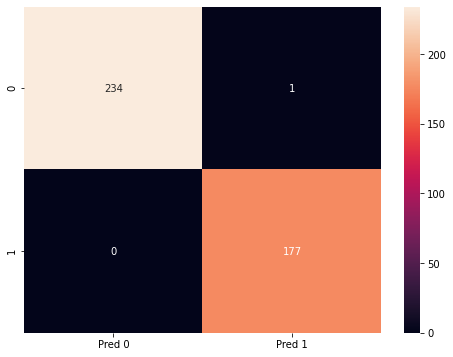

In [44]:
cm_knn = confusion_matrix(y_test, pred_knn, labels=[0, 1])

df_cm_knn = pd.DataFrame(cm_knn, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_knn, annot=True, fmt='d')
plt.show()

### Multi-layer Perceptron Classifier

In [45]:
from sklearn.neural_network import MLPClassifier

mlper_sgd=MLPClassifier(
    hidden_layer_sizes=(8,4), 
    max_iter=1000, 
    alpha=0.0001, 
    solver='sgd',
    verbose=10,
    random_state=1)

mlper_sgd.fit(X_train,y_train)

accuracies_mlper_sgd = cross_val_score(estimator=mlper_sgd,X=X_test,y=y_test,cv=10)

print("Accuracies:\n", accuracies_mlper_sgd)
print("Mean Accuracy: {:.2f}%".format(accuracies_mlper_sgd.mean()*100))

Iteration 1, loss = 0.79446697
Iteration 2, loss = 0.79128315
Iteration 3, loss = 0.78669895
Iteration 4, loss = 0.78126678
Iteration 5, loss = 0.77567029
Iteration 6, loss = 0.76990995
Iteration 7, loss = 0.76421608
Iteration 8, loss = 0.75861991
Iteration 9, loss = 0.75339964
Iteration 10, loss = 0.74794828
Iteration 11, loss = 0.74309428
Iteration 12, loss = 0.73826063
Iteration 13, loss = 0.73367825
Iteration 14, loss = 0.72922057
Iteration 15, loss = 0.72497076
Iteration 16, loss = 0.72051268
Iteration 17, loss = 0.71641056
Iteration 18, loss = 0.71233958
Iteration 19, loss = 0.70829005
Iteration 20, loss = 0.70421642
Iteration 21, loss = 0.70022561
Iteration 22, loss = 0.69634281
Iteration 23, loss = 0.69250354
Iteration 24, loss = 0.68867826
Iteration 25, loss = 0.68483025
Iteration 26, loss = 0.68121871
Iteration 27, loss = 0.67743051
Iteration 28, loss = 0.67362942
Iteration 29, loss = 0.66999989
Iteration 30, loss = 0.66623709
Iteration 31, loss = 0.66258338
Iteration 32, los

In [46]:
pred_mlper_sgd = mlper_sgd.predict(X_test)
pred_mlper_sgd

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

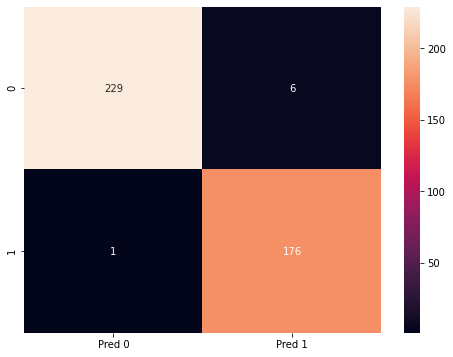

In [47]:
cm_mlper_sgd = confusion_matrix(y_test, pred_mlper_sgd, labels=[0, 1])

df_cm_mlper_sgd = pd.DataFrame(cm_mlper_sgd, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_mlper_sgd, annot=True, fmt='d')
plt.show()

In [48]:
mlper_adam=MLPClassifier(
    hidden_layer_sizes=(8,4), 
    max_iter=1000, 
    alpha=0.0001, 
    solver='adam',
    verbose=10,
    random_state=1)

mlper_adam.fit(X_train,y_train)

accuracies_mlper_adam = cross_val_score(estimator=mlper_adam,X=X_test,y=y_test,cv=10)

print("Accuracies:\n", accuracies_mlper_adam)
print("Mean Accuracy: {:.2f}%".format(accuracies_mlper_adam.mean()*100))

Iteration 1, loss = 0.79200570
Iteration 2, loss = 0.78378662
Iteration 3, loss = 0.77599273
Iteration 4, loss = 0.76824814
Iteration 5, loss = 0.76094179
Iteration 6, loss = 0.75386253
Iteration 7, loss = 0.74695340
Iteration 8, loss = 0.74035516
Iteration 9, loss = 0.73382207
Iteration 10, loss = 0.72710285
Iteration 11, loss = 0.72064011
Iteration 12, loss = 0.71422552
Iteration 13, loss = 0.70792104
Iteration 14, loss = 0.70165224
Iteration 15, loss = 0.69533277
Iteration 16, loss = 0.68874803
Iteration 17, loss = 0.68210022
Iteration 18, loss = 0.67525967
Iteration 19, loss = 0.66784552
Iteration 20, loss = 0.65987998
Iteration 21, loss = 0.65162368
Iteration 22, loss = 0.64332105
Iteration 23, loss = 0.63495190
Iteration 24, loss = 0.62644862
Iteration 25, loss = 0.61791726
Iteration 26, loss = 0.60935478
Iteration 27, loss = 0.60085345
Iteration 28, loss = 0.59218571
Iteration 29, loss = 0.58362509
Iteration 30, loss = 0.57485387
Iteration 31, loss = 0.56618103
Iteration 32, los

In [49]:
pred_mlper_adam = mlper_adam.predict(X_test)
pred_mlper_adam

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

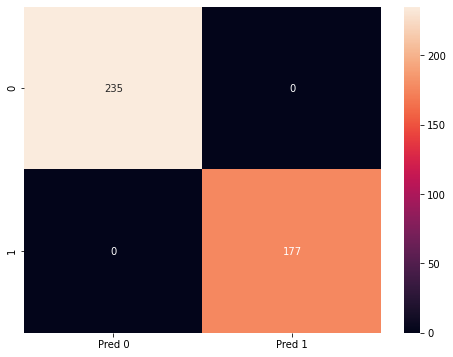

In [50]:
cm_mlper_adam = confusion_matrix(y_test, pred_mlper_adam, labels=[0, 1])

df_cm_mlper_adam = pd.DataFrame(cm_mlper_adam, index=[i for i in [0, 1]], columns=[i for i in ['Pred 0', 'Pred 1']])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_mlper_adam, annot=True, fmt='d')
plt.show()

### Model Comparison

In [51]:
print("Logistic Regression: {}%".format(round(accuracy_score(y_test, pred_logReg)*100, 2)))
print("Support Vector Machine (kernel=linear): {}%".format(round(accuracy_score(y_test, pred_svm_linear)*100, 2)))
print("Support Vector Machine (kernel=rbf): {}%".format(round(accuracy_score(y_test, pred_svm_rbf)*100, 2)))
print("Random Forest Classifier: {}%".format(round(accuracy_score(y_test, pred_rf)*100, 2)))
print("K Nearest Neighbors Classifier: {}%".format(round(accuracy_score(y_test, pred_knn)*100, 2)))
print("Multi-layer Perceptron Classifier (solver=sgd): {}%".format(round(accuracy_score(y_test, pred_mlper_sgd)*100, 2)))
print("Multi-layer Perceptron Classifier (solver=adam): {}%".format(round(accuracy_score(y_test, pred_mlper_adam)*100, 2)))

Logistic Regression: 97.82%
Support Vector Machine (kernel=linear): 98.79%
Support Vector Machine (kernel=rbf): 100.0%
Random Forest Classifier: 99.51%
K Nearest Neighbors Classifier: 99.76%
Multi-layer Perceptron Classifier (solver=sgd): 98.3%
Multi-layer Perceptron Classifier (solver=adam): 100.0%


## Conclusion

In this example, I demonstrate the process:
- Data Pre-processing
- Exploratory Data Analysis
- Data Preparation
- Data Modeling 
- Model Comparison

After changing splits to 7:3 ratio, Support Vector Machine(rbf) and Multi-layer Perceptron Classifier (adam) have 100% accuracy classifying the notes.

The rest of the models also perform very well with greater than 97% accuracy.

However, we still have to concern about **Overfitting** issue.
